In [373]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ! pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [374]:
df = pd.read_csv('Telangana.csv')

In [375]:
df.columns

Index(['From Date', 'To Date', 'Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5',
       'State', 'City', 'Station'],
      dtype='object')

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  8760 non-null   object 
 1   To Date    8760 non-null   object 
 2   Ozone      6130 non-null   float64
 3   CO         6124 non-null   float64
 4   SO2        6138 non-null   float64
 5   NO2        6141 non-null   float64
 6   PM10       6104 non-null   float64
 7   PM2.5      6103 non-null   float64
 8   State      8760 non-null   object 
 9   City       8760 non-null   object 
 10  Station    8760 non-null   object 
dtypes: float64(6), object(5)
memory usage: 752.9+ KB


In [377]:
df.isnull().sum()

From Date       0
To Date         0
Ozone        2630
CO           2636
SO2          2622
NO2          2619
PM10         2656
PM2.5        2657
State           0
City            0
Station         0
dtype: int64

In [378]:
df.describe()

,Ozone,CO,SO2,NO2,PM10,PM2.5
count,6130.000000,6124.000000,6138.000000,6141.000000,6104.000000,6103.000000
mean,20.114829,0.674891,8.254451,15.515050,78.131186,36.535981
std,16.904719,0.396751,6.403741,14.854748,39.010211,18.844151
min,0.400000,0.000000,0.150000,0.170000,4.470000,0.840000
25%,12.620000,0.430000,4.610000,5.360000,48.350000,22.370000
50%,16.350000,0.620000,6.450000,8.570000,71.200000,33.820000
75%,21.510000,0.810000,9.720000,22.360000,100.217500,47.925000
max,181.700000,7.030000,69.520000,123.810000,242.260000,113.530000


In [379]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns.tolist())

df.head()

['From Date', 'To Date', 'Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5', 'State', 'City', 'Station']
['from_date', 'to_date', 'ozone', 'co', 'so2', 'no2', 'pm10', 'pm2.5', 'state', 'city', 'station']


,from_date,to_date,ozone,co,so2,no2,pm10,pm2.5,state,city,station
0,01-08-2021 00:00,02-08-2021 00:00,10.73,0.80,7.68,59.17,35.24,9.76,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB"
1,02-08-2021 00:00,03-08-2021 00:00,7.80,0.12,7.86,37.23,59.63,18.54,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB"
2,03-08-2021 00:00,04-08-2021 00:00,11.32,0.33,15.62,15.85,64.41,21.17,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB"
3,04-08-2021 00:00,05-08-2021 00:00,7.03,0.29,19.49,13.93,45.94,12.65,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB"
4,05-08-2021 00:00,06-08-2021 00:00,7.12,0.29,23.43,15.69,56.57,16.21,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB"


In [380]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 11 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
pm2.5,2657,30.300000
pm10,2656,30.300000
co,2636,30.100000
ozone,2630,30.000000
so2,2622,29.900000
no2,2619,29.900000


In [381]:
city_day = df.copy()

In [382]:
city_day['Particulate_Matter'] = city_day['pm2.5']+city_day['pm10']

In [383]:
pollutants = ['ozone', 'co', 'so2', 'no2', 'pm10', 'pm2.5']


### Concentration vs Time plots for all pollutants

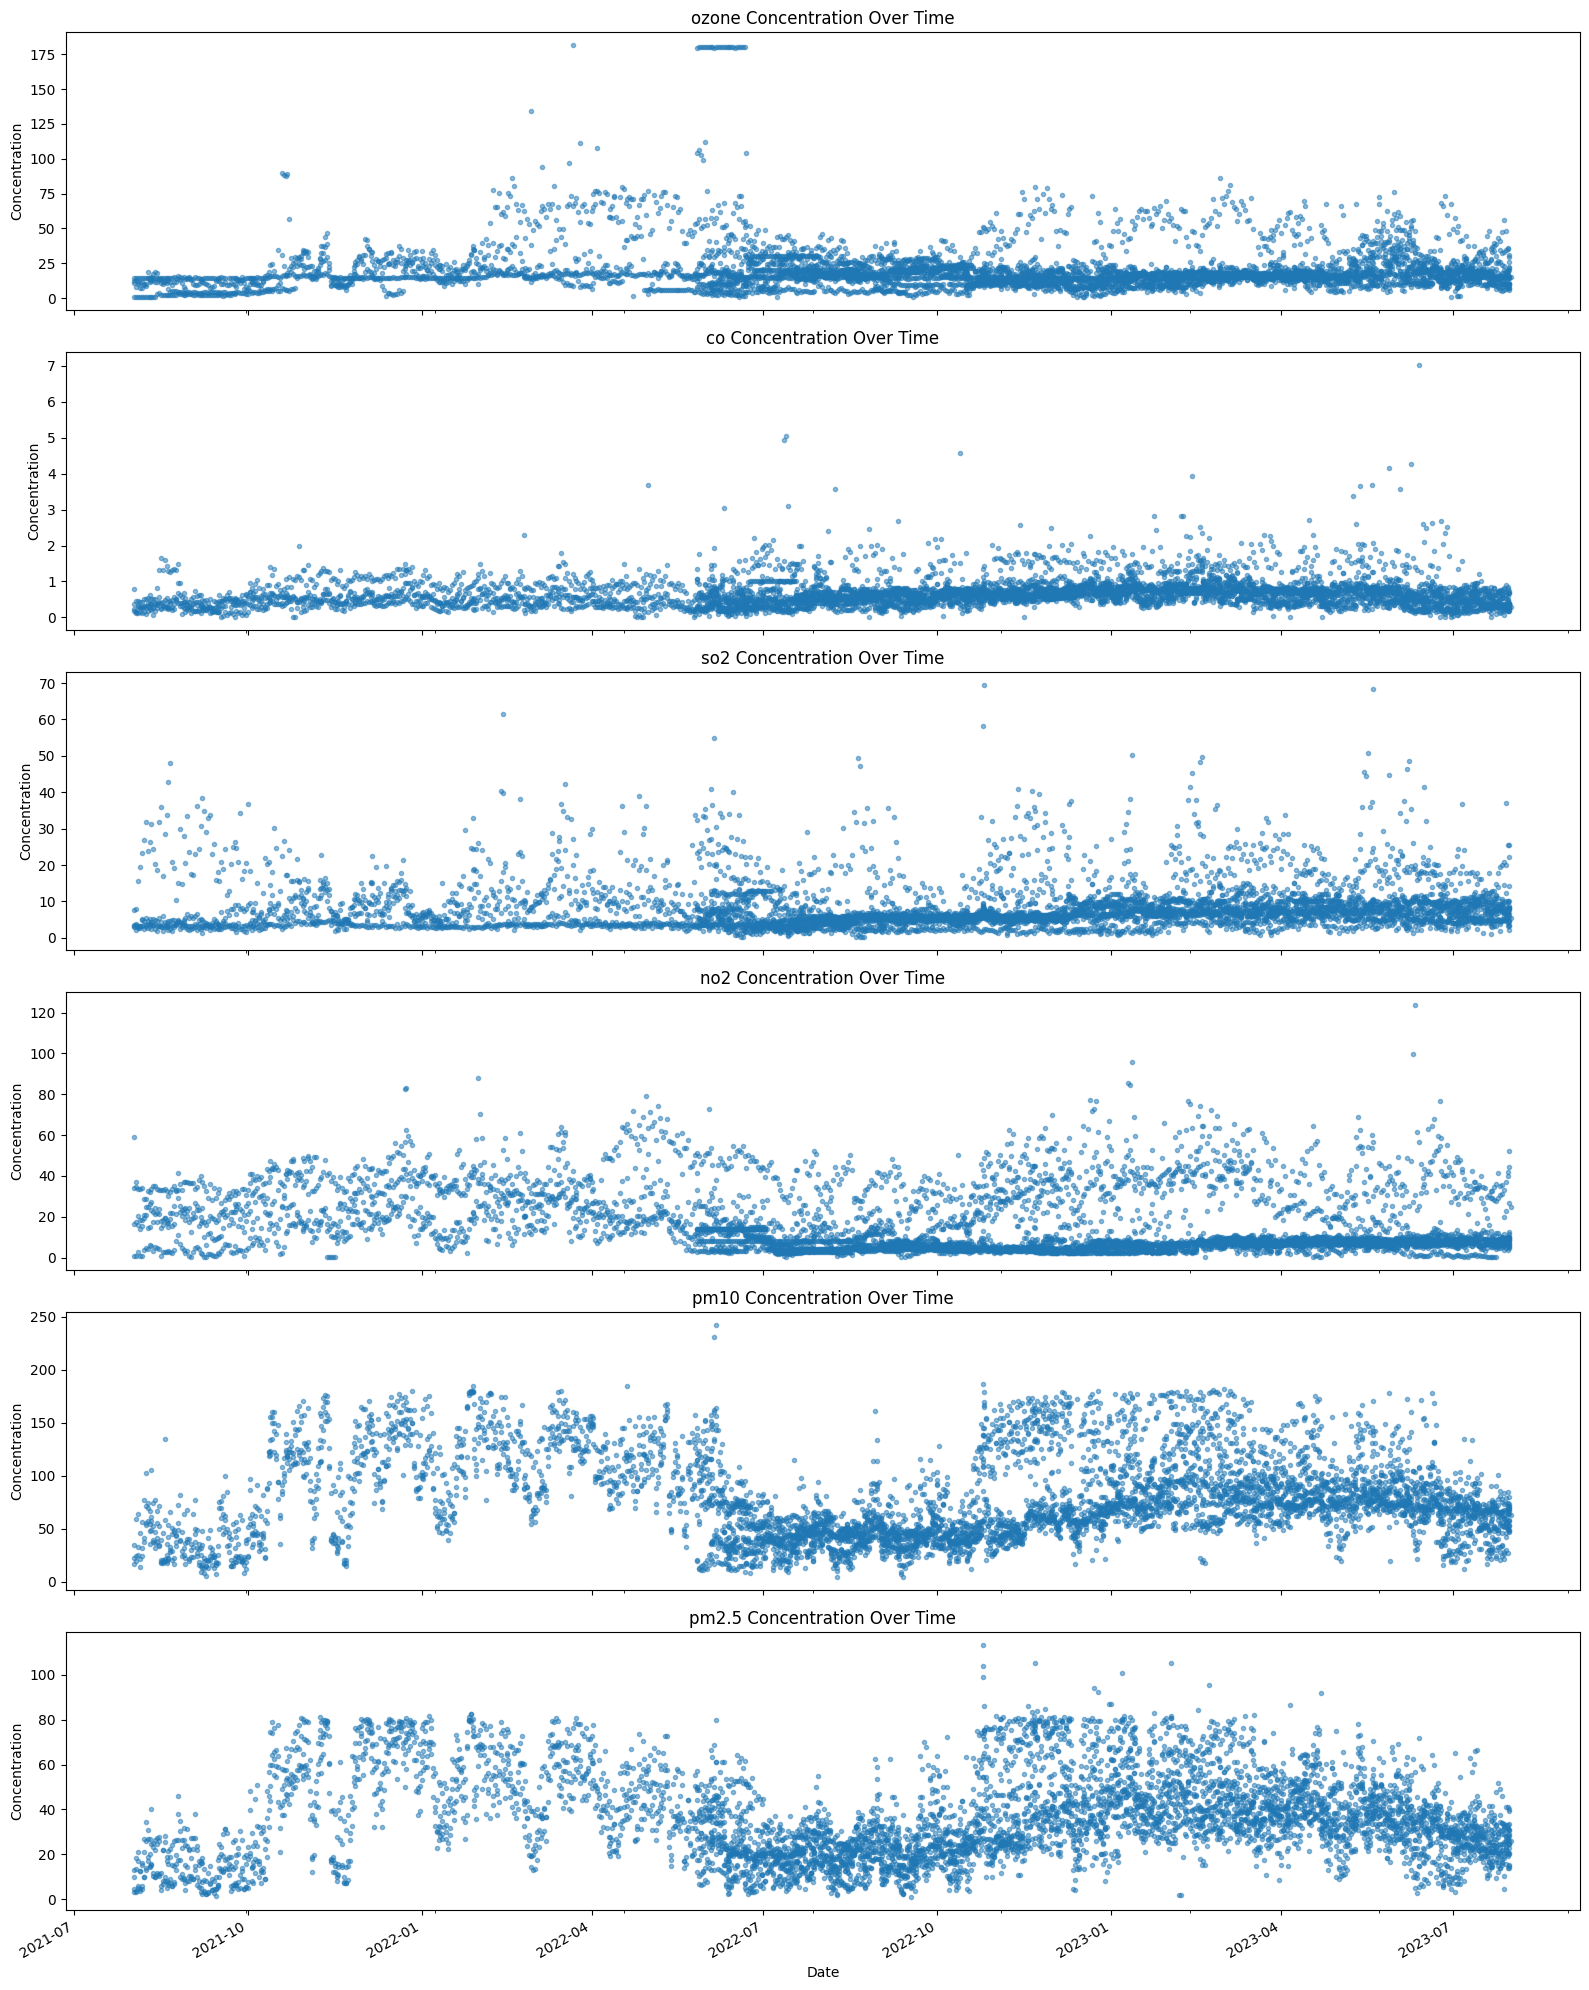

In [384]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the datetime column is set as the index
df['to_date'] = pd.to_datetime(df['to_date'], format='%d-%m-%Y %H:%M')
df.set_index('to_date', inplace=True)


# Plotting concentration vs time
fig, axes = plt.subplots(len(pollutants), 1, figsize=(16, 20), sharex=True)

for i, pollutant in enumerate(pollutants):
    df[pollutant].plot(
        ax=axes[i],
        marker='.', 
        alpha=0.5, 
        linestyle='None',
        title=f'{pollutant} Concentration Over Time'
    )
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Concentration') 

plt.tight_layout()
plt.show()

In [385]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant,'city']].groupby(["city"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [386]:
from IPython.display import display_html
    
def display_side_by_side(*args):
    """
    Displays Pandas Styler objects side-by-side by converting them to HTML.
    """
    html_str = ''
    for df in args:
        html_str += df.to_html() 
        
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [387]:
pm2_5 = max_polluted_city('pm2.5')
pm10 = max_polluted_city('pm10')
no2 = max_polluted_city('no2')
so2 = max_polluted_city('so2')
co = max_polluted_city('co')
ozone = max_polluted_city('ozone')

display_side_by_side(pm2_5, pm10, no2, so2, co, ozone)

,city,pm2.5
0,Hyderabad,36.540000
,city,pm10
0,Hyderabad,78.130000
,city,no2
0,Hyderabad,15.520000
,city,so2
0,Hyderabad,8.250000
,city,co
0,Hyderabad,0.670000
,city,ozone


In [388]:
df1 = df.copy()
df1['pm2.5']=df1['pm2.5'].fillna((df1['pm2.5'].median()))
df1['pm10']=df1['pm10'].fillna((df1['pm10'].median()))
df1['no2']=df1['no2'].fillna((df1['no2'].median()))
df1['co']=df1['co'].fillna((df1['co'].median()))
df1['so2']=df1['so2'].fillna((df1['so2'].median()))
df1['ozone']=df1['ozone'].fillna((df1['ozone'].median()))


In [389]:
df1['city'].value_counts()

city
Hyderabad    8760
Name: count, dtype: int64

In [390]:
df1['Pollution content'] = df1['pm2.5']+df1['pm10']+df1['no2']+df1['co']+df1['so2']+df1['ozone']

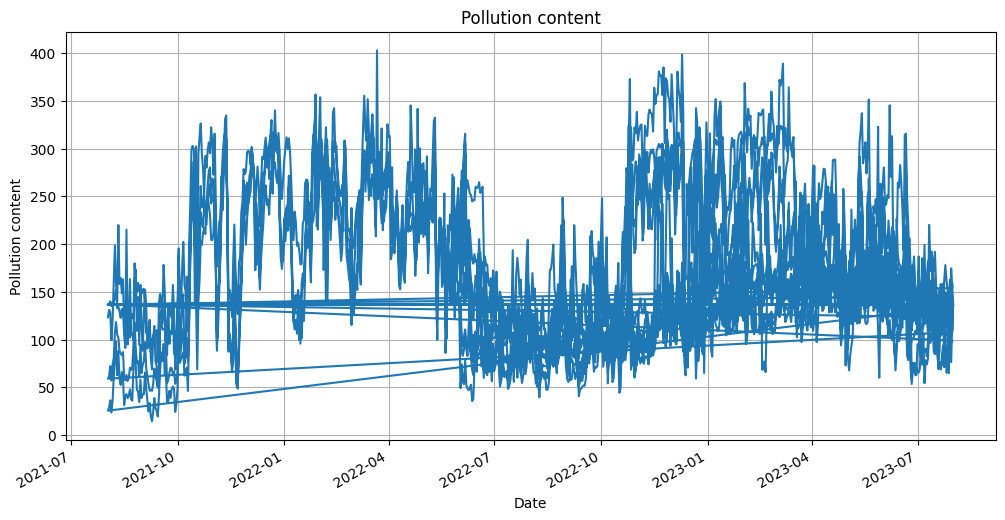

In [391]:
import matplotlib.pyplot as plt

def ploting(var):
    ax = df1[var].plot(figsize=(12, 6), title=var)
    ax.set_xlabel('Date')
    ax.set_ylabel(var)
    plt.grid(True)
    plt.show()

ploting('Pollution content')

In [392]:
import pandas as pd
import numpy as np


# --- Define NAQI Breakpoints ---
# Breakpoints for NAQI (National Air Quality Index - India)
# Units for all concentrations (C) are $\mu\text{g}/\text{m}^3$ except CO which is $\text{mg}/\text{m}^3$.
breakpoints = {
    # (I_Lo, I_Hi, B_Lo, B_Hi) -> (AQI Low, AQI High, Conc Low, Conc High)
    'pm2.5': [(0, 50, 0, 30), (51, 100, 31, 60), (101, 200, 61, 90), (201, 300, 91, 120), (301, 400, 121, 250), (401, 500, 251, 500)],
    'pm10': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 200, 101, 250), (201, 300, 251, 350), (301, 400, 351, 430), (401, 500, 431, 500)],
    'no2': [(0, 50, 0, 40), (51, 100, 41, 80), (101, 200, 81, 180), (201, 300, 181, 280), (301, 400, 281, 400), (401, 500, 401, 500)],
    'ozone': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 200, 101, 168), (201, 300, 169, 208), (301, 400, 209, 748), (401, 500, 749, 1000)],
    'co': [(0, 50, 0, 1.0), (51, 100, 1.1, 2.0), (101, 200, 2.1, 10), (201, 300, 10.1, 17), (301, 400, 17.1, 34), (401, 500, 34.1, 50)], # mg/m^3
    'so2': [(0, 50, 0, 40), (51, 100, 41, 80), (101, 200, 81, 380), (201, 300, 381, 800), (301, 400, 801, 1600), (401, 500, 1601, 2000)]
}
# breakpoints = {
#     # (I_Lo, I_Hi, B_Lo, B_Hi) -> (AQI Low, AQI High, Conc Low, Conc High)
#     'PM2.5': [(0, 50, 0, 30), (51, 100, 31, 60), (101, 200, 61, 90), (201, 300, 91, 120), (301, 400, 121, 250), (401, 500, 251, 500)],
#     'PM10': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 200, 101, 250), (201, 300, 251, 350), (301, 400, 351, 430), (401, 500, 431, 500)],
#     'NO2': [(0, 50, 0, 40), (51, 100, 41, 80), (101, 200, 81, 180), (201, 300, 181, 280), (301, 400, 281, 400), (401, 500, 401, 500)],
#     'Ozone': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 200, 101, 168), (201, 300, 169, 208), (301, 400, 209, 748), (401, 500, 749, 1000)],
#     'CO': [(0, 50, 0, 1.0), (51, 100, 1.1, 2.0), (101, 200, 2.1, 10), (201, 300, 10.1, 17), (301, 400, 17.1, 34), (401, 500, 34.1, 50)], # mg/m^3
#     'SO2': [(0, 50, 0, 40), (51, 100, 41, 80), (101, 200, 81, 380), (201, 300, 381, 800), (301, 400, 801, 1600), (401, 500, 1601, 2000)]
# }


def get_aqi_sub_index(C, pollutant):
    """Calculates the AQI sub-index for a single pollutant concentration C using linear interpolation."""
    if pd.isna(C) or C < 0:
        return np.nan

    for I_Lo, I_Hi, B_Lo, B_Hi in breakpoints[pollutant]:
        if C >= B_Lo and C <= B_Hi:
            # Linear interpolation formula: I = [(I_Hi - I_Lo) / (B_Hi - B_Lo)] * (C - B_Lo) + I_Lo
            if B_Hi == B_Lo:
                return I_Lo
            else:
                return round(((I_Hi - I_Lo) / (B_Hi - B_Lo)) * (C - B_Lo) + I_Lo)
    
    # If concentration is above the highest breakpoint, cap at 500
    if C > breakpoints[pollutant][-1][3]:
        return 500 
    
    return np.nan

def calculate_aqi(row):
    """Calculates the overall AQI (maximum of all sub-indices)."""
    # List of sub-indices for the available pollutants
    sub_indices = [
        get_aqi_sub_index(row['pm2.5'], 'pm2.5'),
        get_aqi_sub_index(row['pm10'], 'pm10'),
        get_aqi_sub_index(row['no2'], 'no2'),
        get_aqi_sub_index(row['ozone'], 'ozone'),
        get_aqi_sub_index(row['co'], 'co'),
        get_aqi_sub_index(row['so2'], 'so2')
    ]
    # sub_indices = [
    #     get_aqi_sub_index(row['PM2.5'], 'PM2.5'),
    #     get_aqi_sub_index(row['PM10'], 'PM10'),
    #     get_aqi_sub_index(row['NO2'], 'NO2'),
    #     get_aqi_sub_index(row['Ozone'], 'Ozone'),
    #     get_aqi_sub_index(row['CO'], 'CO'),
    #     get_aqi_sub_index(row['SO2'], 'SO2')
    # ]
    
    # The overall AQI is the maximum of the sub-indices (NAQI standard)
    return np.nanmax(sub_indices) if any(~np.isnan(sub_indices)) else np.nan

def get_aqi_category(aqi):
    """Assigns the AQI category based on the user's requested labels ('Good', 'Moderate', 'Severe')."""
    if pd.isna(aqi):
        return np.nan
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 200:
        return 'Moderate' # Combines Satisfactory and Moderately Polluted
    else:
        return 'Severe' # Combines Poor, Very Poor, and Severe

# --- Apply Functions to DataFrame ---

# Rename columns to match the breakpoints keys (assuming standard names in your CSV)
# You can comment this out if your column names are already 'PM2.5', 'PM10', etc.
# df.rename(columns={'pm2.5': 'PM2.5', 'pm10': 'PM10', 'ozone': 'Ozone',
#                    'co': 'CO', 'so2': 'SO2', 'no2': 'NO2'}, inplace=True)

# Calculate the AQI for each row
df['AQI'] = df.apply(calculate_aqi, axis=1)

# Assign the AQI category
df['AQI Category'] = df['AQI'].apply(get_aqi_category)


print(df[['pm2.5', 'pm10', 'AQI', 'AQI Category']].head())

# If you want to save the updated DataFrame for your EDA report:
# df.to_csv('Telangana.csv', index=False)

            pm2.5   pm10   AQI AQI Category
to_date                                    
2021-08-02   9.76  35.24  74.0     Moderate
2021-08-03  18.54  59.63  60.0     Moderate
2021-08-04  21.17  64.41  64.0     Moderate
2021-08-05  12.65  45.94  46.0         Good
2021-08-06  16.21  56.57  57.0     Moderate


In [393]:
# !pip install ydata-profiling
# ! pip install --upgrade spacy thinc

### EDA Report

In [394]:
# from ydata_profiling import ProfileReport 

# # Load your data
# data = pd.read_csv("Telangana.csv")

# # Generate the report using the new library
# profile = ProfileReport(data, title="EDA", explorative=True)
# profile.to_file("EDA_Report.html")

### CatBoost Regressor Model Implementation

In [395]:
# !pip install catboost



Training CatBoost for ozone
ozone — R²: 0.3764, RMSE: 13.3084, MAE: 8.6173

Training CatBoost for co
co — R²: 0.1223, RMSE: 0.3593, MAE: 0.2457

Training CatBoost for so2
so2 — R²: 0.0920, RMSE: 6.0310, MAE: 3.7354

Training CatBoost for no2
no2 — R²: 0.2559, RMSE: 12.4799, MAE: 8.7385

Training CatBoost for pm10
pm10 — R²: 0.9321, RMSE: 10.2109, MAE: 6.0651

Training CatBoost for pm2.5
pm2.5 — R²: 0.7794, RMSE: 8.8587, MAE: 6.9623


📊 CatBoost Model Performance Summary:
           R2     RMSE     MAE
ozone  0.3764  13.3084  8.6173
co     0.1223   0.3593  0.2457
so2    0.0920   6.0310  3.7354
no2    0.2559  12.4799  8.7385
pm10   0.9321  10.2109  6.0651
pm2.5  0.7794   8.8587  6.9623

Plotting feature importance for pm2.5


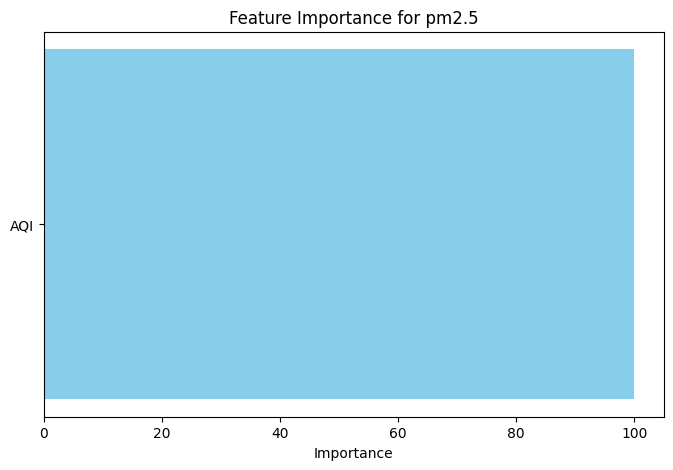

In [396]:
# ==========================================================
# CATBOOST MODEL FOR MULTIPLE POLLUTANT CONCENTRATIONS
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



# ----------------------------------------------------------
# 2️⃣ Data preprocessing
# ----------------------------------------------------------
# Convert date columns to datetime and remove them
dfcat=df.copy()


dfcat['from_date'] = pd.to_datetime(dfcat['from_date'], errors='coerce')
# dfcat['to_date'] = pd.to_datetime(dfcat['to_date'], errors='coerce')

# Drop non-numeric columns (State, City, Station, From Date, To Date)
# dfcat = dfcat.drop(columns=['from_date', 'to_date', 'state', 'city', 'station'])
dfcat = dfcat.drop(columns=['from_date', 'state', 'city', 'station', 'AQI Category'])

# Drop missing values (or you could fill them)
dfcat = dfcat.dropna()

# dfcat.columns
# dfcat.head()


# ----------------------------------------------------------
# 3️⃣ Define features (X) and multiple targets (y)
# ----------------------------------------------------------
target_cols = ['ozone', 'co', 'so2', 'no2', 'pm10', 'pm2.5']
X = dfcat.drop(columns=target_cols)

# Dictionary to store results
results = {}

# ----------------------------------------------------------
# 4️⃣ Train separate CatBoost models for each pollutant
# ----------------------------------------------------------
for target in target_cols:
    print(f"\n===========================")
    print(f"Training CatBoost for {target}")
    print(f"===========================")

    y = dfcat[target]

    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize CatBoostRegressor
    model = CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=8,
        l2_leaf_reg=3,
        loss_function='RMSE',
        random_seed=42,
        verbose=False
    )

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results[target] = {
        'R2': round(r2, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    }

    print(f"{target} — R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# ----------------------------------------------------------
# 5️⃣ Display summary performance
# ----------------------------------------------------------
print("\n\n📊 CatBoost Model Performance Summary:")
results_df = pd.DataFrame(results).T
print(results_df)

# ----------------------------------------------------------
# 6️⃣ Optional: visualize feature importance for one pollutant
# ----------------------------------------------------------
example_target = 'pm2.5'
print(f"\nPlotting feature importance for {example_target}")
y = dfcat[example_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
example_model = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=8, verbose=False)
example_model.fit(X_train, y_train)
feature_importances = example_model.get_feature_importance()

plt.figure(figsize=(8, 5))
plt.barh(range(len(feature_importances)), feature_importances, color='skyblue')
plt.yticks(range(len(feature_importances)), X.columns)
plt.title(f"Feature Importance for {example_target}")
plt.xlabel("Importance")
plt.show()
